<a href="https://colab.research.google.com/github/trinay-A/Temp/blob/main/ETH_FINAL_LSTM_GRU_BILSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional

In [144]:
# Load the data
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataETH2017.csv'
data = pd.read_csv(InputFileLink, header=0, index_col=0)
values = data['ETH / Price, USD'].values

In [145]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

In [146]:
# Split the data into train and test sets
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

In [147]:
# Function to create the dataset with lookback
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:(i+lookback), 0])
        Y.append(data[i+lookback, 0])
    return np.array(X), np.array(Y)

lookback = 10

In [148]:
# Create the train and test datasets
train_X, train_y = create_dataset(train_data, lookback)
test_X, test_y = create_dataset(test_data, lookback)

In [149]:
# Reshape the input data to fit the LSTM and GRU models
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [150]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(lookback, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(lookback, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Build the Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, input_shape=(lookback, 1))))
bilstm_model.add(Dense(1))
bilstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [151]:
# Train the models
lstm_history = lstm_model.fit(train_X, train_y, epochs=300, batch_size=16, verbose=1)
# gru_history = gru_model.fit(train_X, train_y, epochs=300, batch_size=16, verbose=1)
# bilstm_history = bilstm_model.fit(train_X, train_y, epochs=300, batch_size=16, verbose=1)
# lstm_history = lstm_model.fit(train_X, train_y, epochs=300, batch_size=32, verbose=1)
gru_history = gru_model.fit(train_X, train_y, epochs=100, batch_size=16, verbose=1)
bilstm_history = bilstm_model.fit(train_X, train_y, epochs=300, batch_size=16, verbose=1)

Epoch 1/300
39/39 [==============================] - 3s 8ms/step - loss: 0.0245
Epoch 2/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 3/300
39/39 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 4/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 5/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 6/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 7/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 8/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 10/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 11/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 12/300
39/39 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 13/300
39/39 [=================

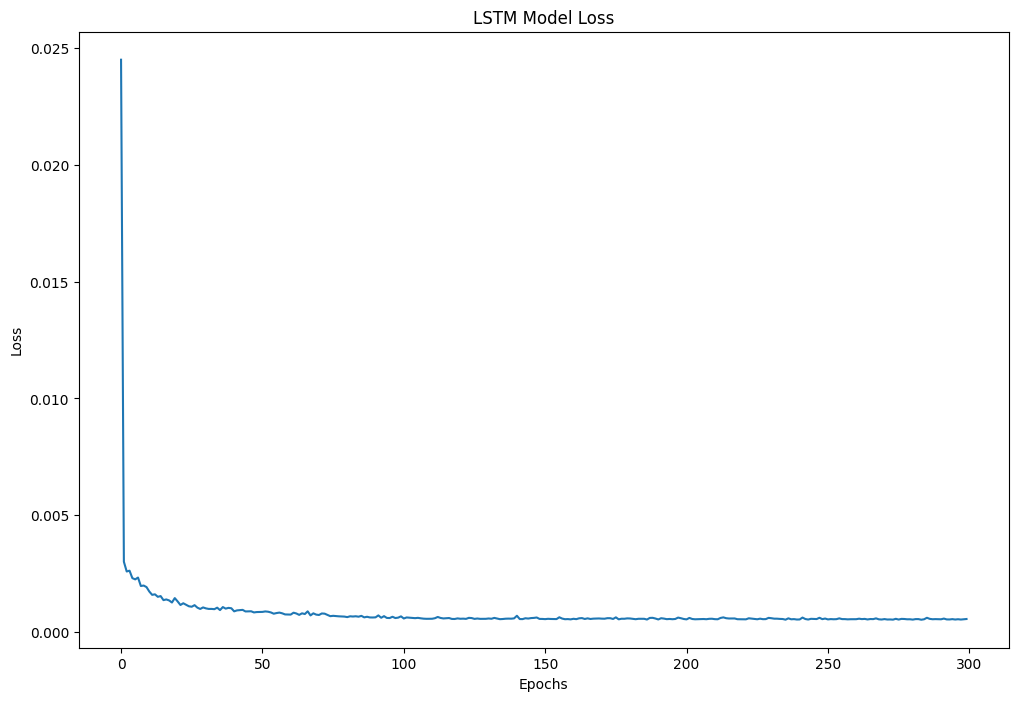

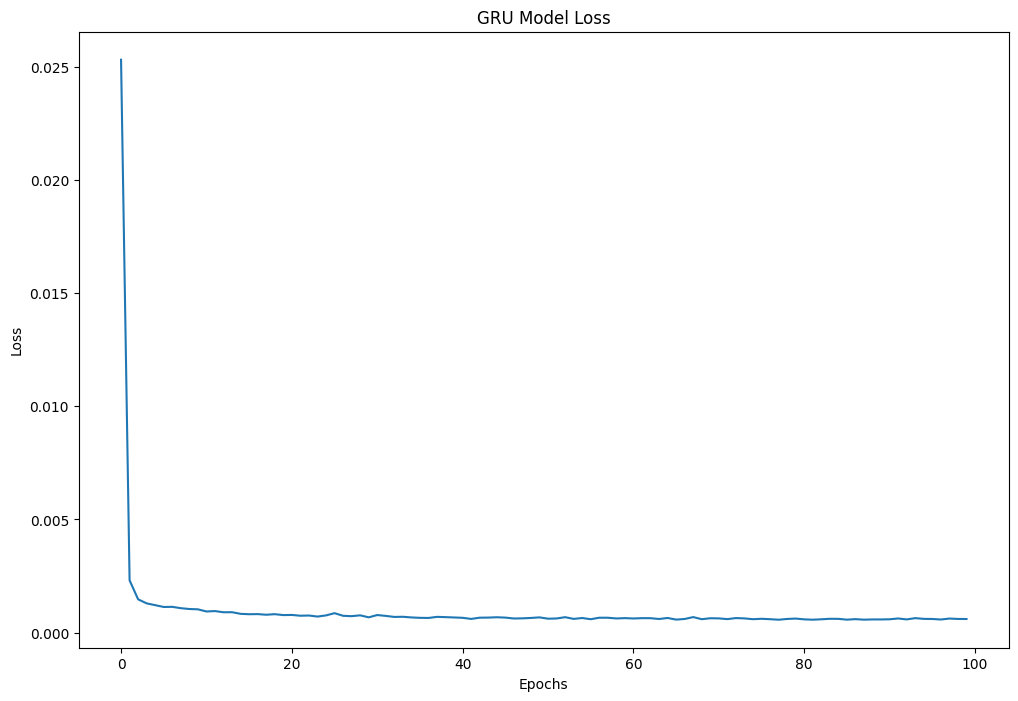

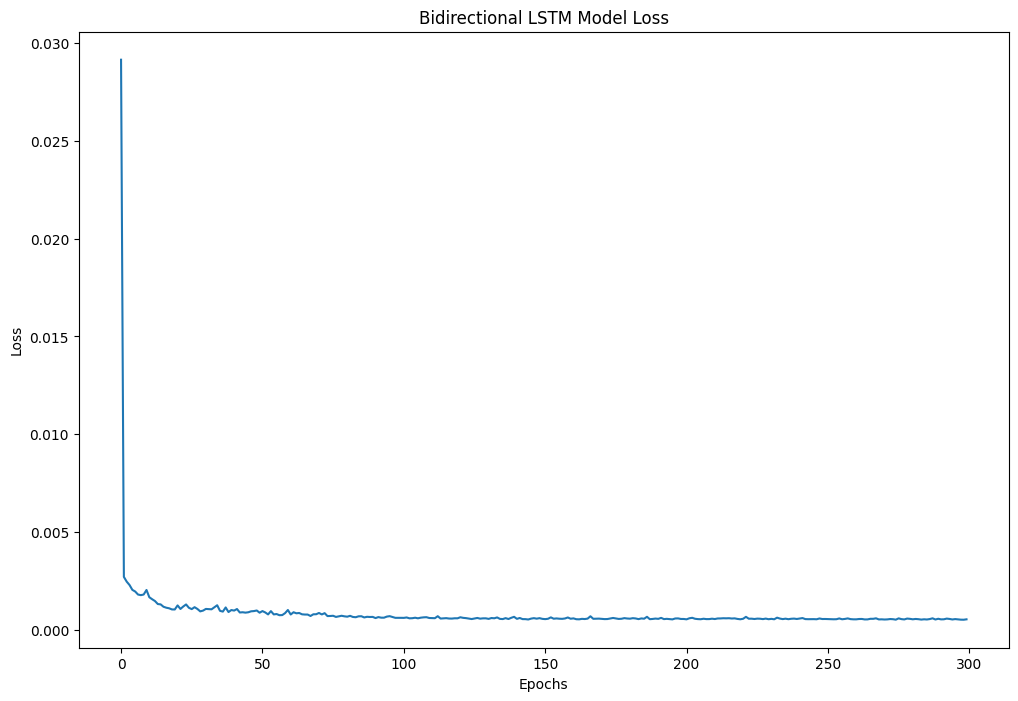

In [152]:
# Plot the loss values over epochs
plt.figure(figsize=(12, 8))
plt.plot(lstm_history.history['loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(gru_history.history['loss'])
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(bilstm_history.history['loss'])
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [153]:
# Make predictions
train_predict_lstm = lstm_model.predict(train_X)
test_predict_lstm = lstm_model.predict(test_X)

train_predict_gru = gru_model.predict(train_X)
test_predict_gru = gru_model.predict(test_X)

train_predict_bilstm = bilstm_model.predict(train_X)
test_predict_bilstm = bilstm_model.predict(test_X)

5/5 [==============================] - 0s 4ms/step


In [154]:
train_rmse_lstm = np.sqrt(np.mean(np.square(train_y - train_predict_lstm)))
test_rmse_lstm = np.sqrt(np.mean(np.square(test_y - test_predict_lstm)))

train_rmse_gru = np.sqrt(np.mean(np.square(train_y - train_predict_gru)))
test_rmse_gru = np.sqrt(np.mean(np.square(test_y - test_predict_gru)))

train_rmse_bilstm = np.sqrt(np.mean(np.square(train_y - train_predict_bilstm)))
test_rmse_bilstm = np.sqrt(np.mean(np.square(test_y - test_predict_bilstm)))

train_mse_lstm = np.mean(np.square(train_y - train_predict_lstm))
test_mse_lstm = np.mean(np.square(test_y - test_predict_lstm))

train_mse_gru = np.mean(np.square(train_y - train_predict_gru))
test_mse_gru = np.mean(np.square(test_y - test_predict_gru))

train_mse_bilstm = np.mean(np.square(train_y - train_predict_bilstm))
test_mse_bilstm = np.mean(np.square(test_y - test_predict_bilstm))

train_mae_lstm = np.mean(np.abs(train_y - train_predict_lstm))
test_mae_lstm = np.mean(np.abs(test_y - test_predict_lstm))

train_mae_gru = np.mean(np.abs(train_y - train_predict_gru))
test_mae_gru = np.mean(np.abs(test_y - test_predict_gru))

train_mae_bilstm = np.mean(np.abs(train_y - train_predict_bilstm))
test_mae_bilstm = np.mean(np.abs(test_y - test_predict_bilstm))

train_mape_lstm = np.mean(np.abs((train_y - train_predict_lstm) / train_y)) * 100
test_mape_lstm = np.mean(np.abs((test_y - test_predict_lstm) / test_y)) * 100

train_mape_gru = np.mean(np.abs((train_y - train_predict_gru) / train_y)) * 100
test_mape_gru = np.mean(np.abs((test_y - test_predict_gru) / test_y)) * 100

train_mape_bilstm = np.mean(np.abs((train_y - train_predict_bilstm) / train_y)) * 100
test_mape_bilstm = np.mean(np.abs((test_y - test_predict_bilstm) / test_y)) * 100

<ipython-input-154-43a5af3719f7>:28: RuntimeWarning: divide by zero encountered in true_divide
  train_mape_lstm = np.mean(np.abs((train_y - train_predict_lstm) / train_y)) * 100
<ipython-input-154-43a5af3719f7>:31: RuntimeWarning: divide by zero encountered in true_divide
  train_mape_gru = np.mean(np.abs((train_y - train_predict_gru) / train_y)) * 100
<ipython-input-154-43a5af3719f7>:34: RuntimeWarning: divide by zero encountered in true_divide
  train_mape_bilstm = np.mean(np.abs((train_y - train_predict_bilstm) / train_y)) * 100


In [155]:
# Print evaluation metrics
print('LSTM Train RMSE: %.6f' % (train_rmse_lstm))
print('LSTM Test RMSE: %.6f' % (test_rmse_lstm))
print('LSTM Train MSE: %.6f' % (train_mse_lstm))
print('LSTM Test MSE: %.6f' % (test_mse_lstm))
print('LSTM Train MAE: %.6f' % (train_mae_lstm))
print('LSTM Test MAE: %.6f' % (test_mae_lstm))
print('LSTM Train MAPE: %.6f%%' % (train_mape_lstm))
print('LSTM Test MAPE: %.6f%%' % (test_mape_lstm))

print('GRU Train RMSE: %.6f' % (train_rmse_gru))
print('GRU Test RMSE: %.6f' % (test_rmse_gru))
print('GRU Train MSE: %.6f' % (train_mse_gru))
print('GRU Test MSE: %.6f' % (test_mse_gru))
print('GRU Train MAE: %.6f' % (train_mae_gru))
print('GRU Test MAE: %.6f' % (test_mae_gru))
print('GRU Train MAPE: %.6f%%' % (train_mape_gru))
print('GRU Test MAPE: %.6f%%' % (test_mape_gru))

print('Bidirectional LSTM Train RMSE: %.6f' % (train_rmse_bilstm))
print('Bidirectional LSTM Test RMSE: %.6f' % (test_rmse_bilstm))
print('Bidirectional LSTM Train MSE: %.6f' % (train_mse_bilstm))
print('Bidirectional LSTM Test MSE: %.6f' % (test_mse_bilstm))
print('Bidirectional LSTM Train MAE: %.6f' % (train_mae_bilstm))
print('Bidirectional LSTM Test MAE: %.6f' % (test_mae_bilstm))
print('Bidirectional LSTM Train MAPE: %.6f%%' % (train_mape_bilstm))
print('Bidirectional LSTM Test MAPE: %.6f%%' % (test_mape_bilstm))

LSTM Train RMSE: 0.287272
LSTM Test RMSE: 0.060062
LSTM Train MSE: 0.082525
LSTM Test MSE: 0.003607
LSTM Train MAE: 0.218937
LSTM Test MAE: 0.048730
LSTM Train MAPE: inf%
LSTM Test MAPE: 58.819081%
GRU Train RMSE: 0.292037
GRU Test RMSE: 0.061289
GRU Train MSE: 0.085286
GRU Test MSE: 0.003756
GRU Train MAE: 0.222580
GRU Test MAE: 0.049727
GRU Train MAPE: inf%
GRU Test MAPE: 61.231054%
Bidirectional LSTM Train RMSE: 0.291985
Bidirectional LSTM Test RMSE: 0.060999
Bidirectional LSTM Train MSE: 0.085255
Bidirectional LSTM Test MSE: 0.003721
Bidirectional LSTM Train MAE: 0.222585
Bidirectional LSTM Test MAE: 0.049486
Bidirectional LSTM Train MAPE: inf%
Bidirectional LSTM Test MAPE: 60.192712%


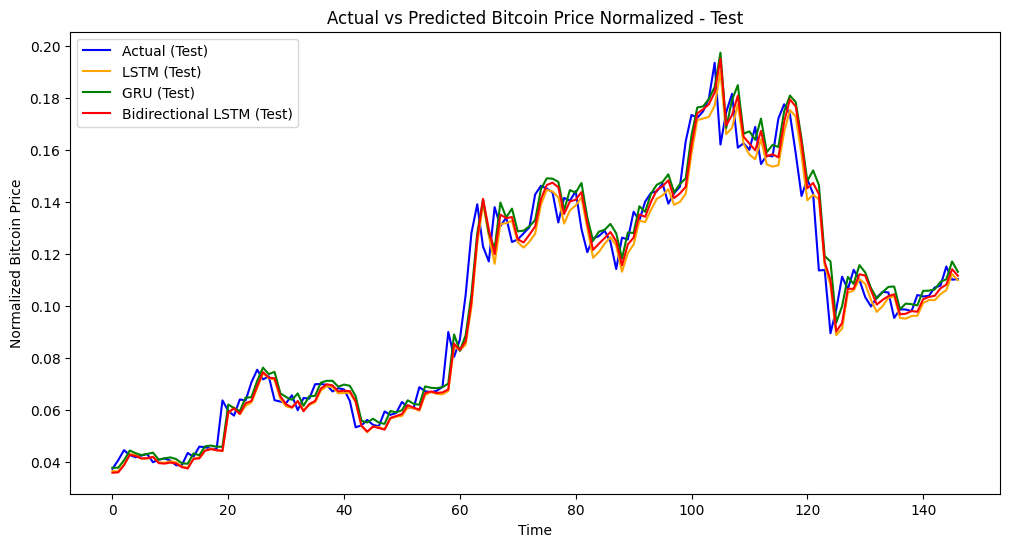

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Actual (Test)', color='blue')
plt.plot(test_predict_lstm, label='LSTM (Test)', color='orange')
plt.plot(test_predict_gru, label='GRU (Test)', color='green')
plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)', color='red')
plt.title('Actual vs Predicted Bitcoin Price Normalized - Test')
plt.xlabel('Time')
plt.ylabel('Normalized Bitcoin Price')
plt.legend()
plt.show()

In [157]:
# Denormalize the predictions
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

train_predict_bilstm = scaler.inverse_transform(train_predict_bilstm)
test_predict_bilstm = scaler.inverse_transform(test_predict_bilstm)

# Denormalize the actual values
train_actual = scaler.inverse_transform(train_y.reshape(-1, 1))
test_actual = scaler.inverse_transform(test_y.reshape(-1, 1))

In [158]:
# Calculate evaluation metrics
train_rmse_lstm = np.sqrt(np.mean(np.square(train_actual - train_predict_lstm)))
test_rmse_lstm = np.sqrt(np.mean(np.square(test_actual - test_predict_lstm)))

train_rmse_gru = np.sqrt(np.mean(np.square(train_actual - train_predict_gru)))
test_rmse_gru = np.sqrt(np.mean(np.square(test_actual - test_predict_gru)))

train_rmse_bilstm = np.sqrt(np.mean(np.square(train_actual - train_predict_bilstm)))
test_rmse_bilstm = np.sqrt(np.mean(np.square(test_actual - test_predict_bilstm)))

train_mse_lstm = np.mean(np.square(train_actual - train_predict_lstm))
test_mse_lstm = np.mean(np.square(test_actual - test_predict_lstm))

train_mse_gru = np.mean(np.square(train_actual - train_predict_gru))
test_mse_gru = np.mean(np.square(test_actual - test_predict_gru))

train_mse_bilstm = np.mean(np.square(train_actual - train_predict_bilstm))
test_mse_bilstm = np.mean(np.square(test_actual - test_predict_bilstm))

train_mae_lstm = np.mean(np.abs(train_actual - train_predict_lstm))
test_mae_lstm = np.mean(np.abs(test_actual - test_predict_lstm))

train_mae_gru = np.mean(np.abs(train_actual - train_predict_gru))
test_mae_gru = np.mean(np.abs(test_actual - test_predict_gru))

train_mae_bilstm = np.mean(np.abs(train_actual - train_predict_bilstm))
test_mae_bilstm = np.mean(np.abs(test_actual - test_predict_bilstm))

train_mape_lstm = np.mean(np.abs((train_actual - train_predict_lstm) / train_actual)) * 100
test_mape_lstm = np.mean(np.abs((test_actual - test_predict_lstm) / test_actual)) * 100

train_mape_gru = np.mean(np.abs((train_actual - train_predict_gru) / train_actual)) * 100
test_mape_gru = np.mean(np.abs((test_actual - test_predict_gru) / test_actual)) * 100

train_mape_bilstm = np.mean(np.abs((train_actual - train_predict_bilstm) / train_actual)) * 100
test_mape_bilstm = np.mean(np.abs((test_actual - test_predict_bilstm) / test_actual)) * 100

In [159]:
# Print evaluation metrics
print('LSTM Train RMSE: %.6f' % (train_rmse_lstm))
print('LSTM Test RMSE: %.6f' % (test_rmse_lstm))
print('LSTM Train MSE: %.6f' % (train_mse_lstm))
print('LSTM Test MSE: %.6f' % (test_mse_lstm))
print('LSTM Train MAE: %.6f' % (train_mae_lstm))
print('LSTM Test MAE: %.6f' % (test_mae_lstm))
print('LSTM Train MAPE: %.6f%%' % (train_mape_lstm))
print('LSTM Test MAPE: %.6f%%' % (test_mape_lstm))

print('GRU Train RMSE: %.6f' % (train_rmse_gru))
print('GRU Test RMSE: %.6f' % (test_rmse_gru))
print('GRU Train MSE: %.6f' % (train_mse_gru))
print('GRU Test MSE: %.6f' % (test_mse_gru))
print('GRU Train MAE: %.6f' % (train_mae_gru))
print('GRU Test MAE: %.6f' % (test_mae_gru))
print('GRU Train MAPE: %.6f%%' % (train_mape_gru))
print('GRU Test MAPE: %.6f%%' % (test_mape_gru))

print('Bidirectional LSTM Train RMSE: %.6f' % (train_rmse_bilstm))
print('Bidirectional LSTM Test RMSE: %.6f' % (test_rmse_bilstm))
print('Bidirectional LSTM Train MSE: %.6f' % (train_mse_bilstm))
print('Bidirectional LSTM Test MSE: %.6f' % (test_mse_bilstm))
print('Bidirectional LSTM Train MAE: %.6f' % (train_mae_bilstm))
print('Bidirectional LSTM Test MAE: %.6f' % (test_mae_bilstm))
print('Bidirectional LSTM Train MAPE: %.6f%%' % (train_mape_bilstm))
print('Bidirectional LSTM Test MAPE: %.6f%%' % (test_mape_bilstm))
# LSTM Train RMSE: 449.457226
# LSTM Test RMSE: 442.274723
# LSTM Train MSE: 202011.798077
# LSTM Test MSE: 195606.930574
# LSTM Train MAE: 290.248395
# LSTM Test MAE: 286.594886
# LSTM Train MAPE: 4.131553%
# LSTM Test MAPE: 3.443388%
# GRU Train RMSE: 411.422682
# GRU Test RMSE: 422.203588
# GRU Train MSE: 169268.622929
# GRU Test MSE: 178255.869503
# GRU Train MAE: 241.098019
# GRU Test MAE: 269.661025
# GRU Train MAPE: 3.334109%
# GRU Test MAPE: 3.084153%
# Bidirectional LSTM Train RMSE: 424.090929
# Bidirectional LSTM Test RMSE: 440.430839
# Bidirectional LSTM Train MSE: 179853.115727
# Bidirectional LSTM Test MSE: 193979.323850
# Bidirectional LSTM Train MAE: 256.621174
# Bidirectional LSTM Test MAE: 292.747768
# Bidirectional LSTM Train MAPE: 3.684123%
# Bidirectional LSTM Test MAPE: 3.566017%


LSTM Train RMSE: 30.168496
LSTM Test RMSE: 11.313925
LSTM Train MSE: 910.138180
LSTM Test MSE: 128.004898
LSTM Train MAE: 17.736550
LSTM Test MAE: 7.904634
LSTM Train MAPE: 4.152552%
LSTM Test MAPE: 3.474839%
GRU Train RMSE: 31.278189
GRU Test RMSE: 11.326275
GRU Train MSE: 978.325092
GRU Test MSE: 128.284504
GRU Train MAE: 18.752033
GRU Test MAE: 7.425821
GRU Train MAPE: 4.475373%
GRU Test MAPE: 3.311282%
Bidirectional LSTM Train RMSE: 29.929746
Bidirectional LSTM Test RMSE: 11.047674
Bidirectional LSTM Train MSE: 895.789708
Bidirectional LSTM Test MSE: 122.051100
Bidirectional LSTM Train MAE: 17.779185
Bidirectional LSTM Test MAE: 7.345716
Bidirectional LSTM Train MAPE: 4.220203%
Bidirectional LSTM Test MAPE: 3.267508%


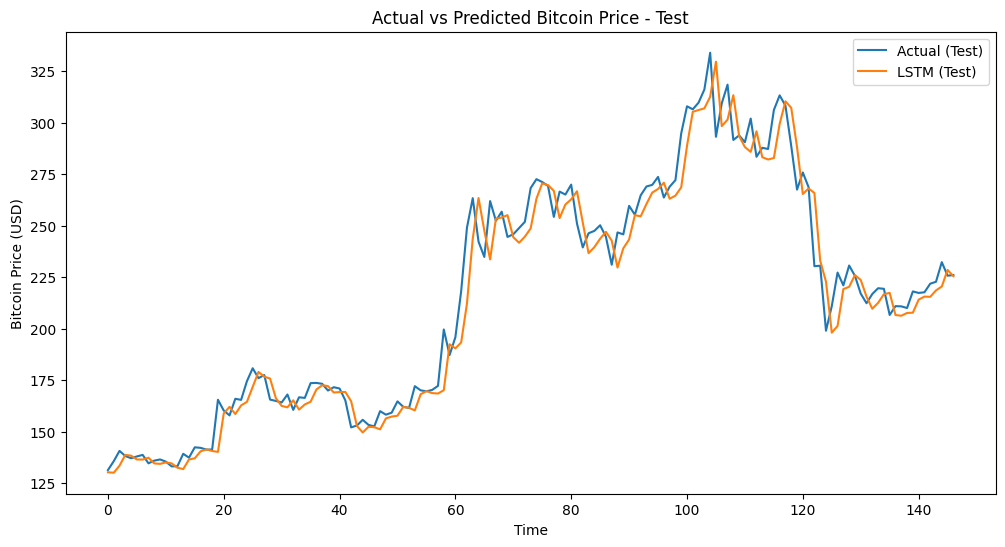

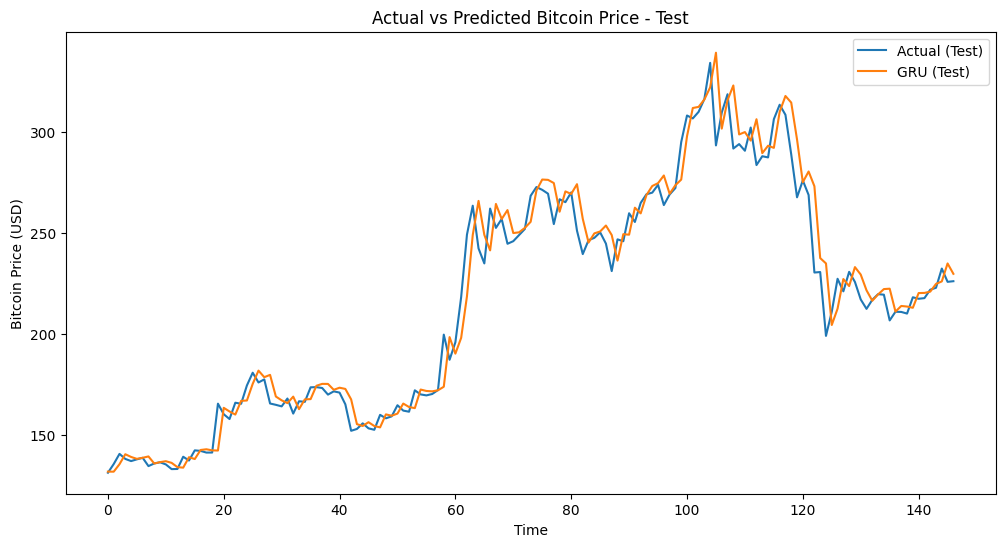

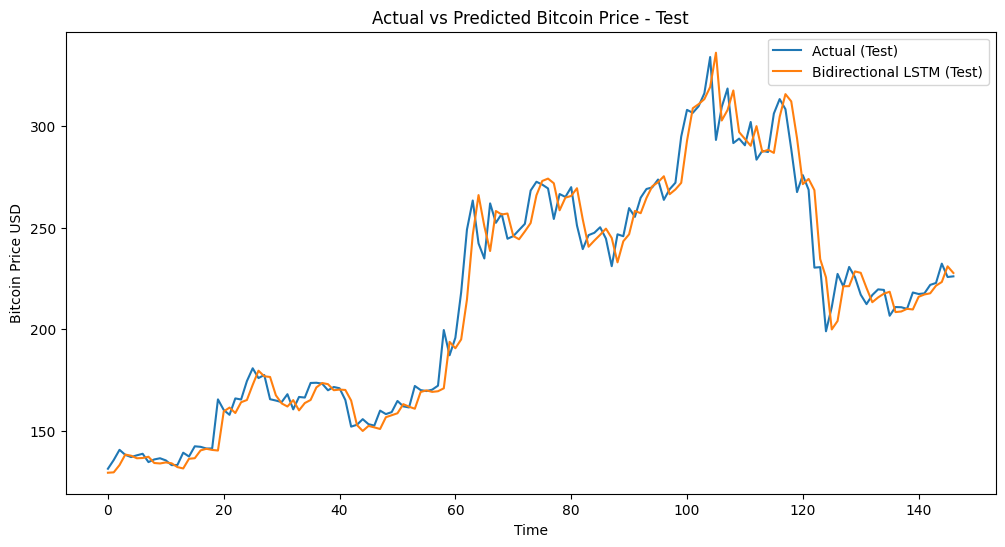

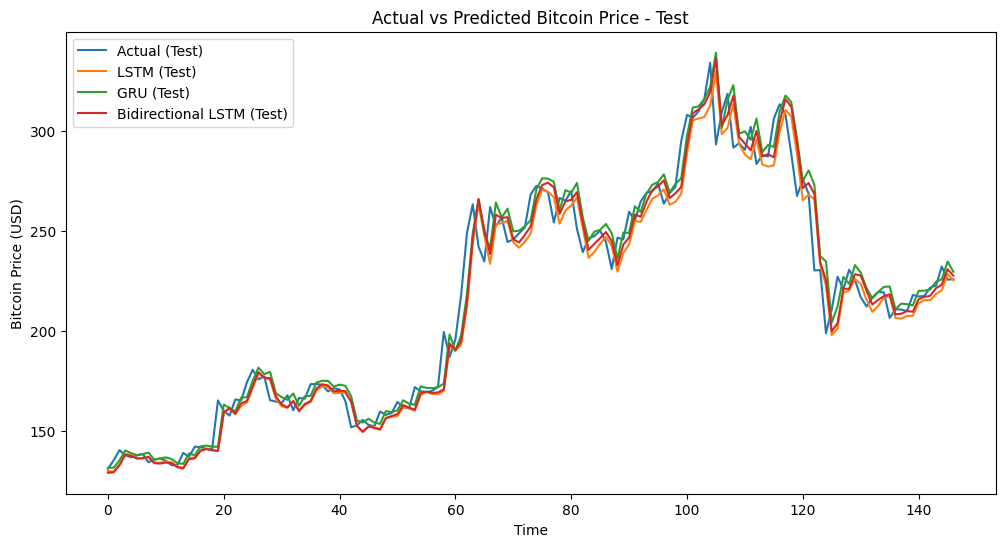

In [160]:
import matplotlib.pyplot as plt

# # Plot actual vs predicted Bitcoin price (normalized values)
# plt.figure(figsize=(12, 6))
# plt.plot(train_actual, label='Actual (Train)', color='blue')
# plt.plot(train_predict_lstm, label='LSTM (Train)', color='orange')
# plt.plot(train_predict_gru, label='GRU (Train)', color='green')
# plt.plot(train_predict_bilstm, label='Bidirectional LSTM (Train)', color='red')
# plt.title('Actual vs Predicted Bitcoin Price (Normalized) - Train')
# plt.xlabel('Time')
# plt.ylabel('Normalized Bitcoin Price')
# plt.legend()
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual (Test)')
plt.plot(test_predict_lstm, label='LSTM (Test)')
# plt.plot(test_predict_gru, label='GRU (Test)', color='green')
# plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)', color='red', linestyle = 'dashed')
plt.title('Actual vs Predicted Bitcoin Price - Test')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

###################################################################################################
plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual (Test)')
# plt.plot(test_predict_lstm, label='LSTM (Test)', color='black')
plt.plot(test_predict_gru, label='GRU (Test)')
# plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)', color='red', linestyle = 'dashed')
plt.title('Actual vs Predicted Bitcoin Price - Test')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

###################################################################################################
plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual (Test)')
# plt.plot(test_predict_lstm, label='LSTM (Test)', color='black')
# plt.plot(test_predict_gru, label='GRU (Test)')
plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)')
plt.title('Actual vs Predicted Bitcoin Price - Test')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price USD')
plt.legend()
plt.show()


###################################################################################################
plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual (Test)')
plt.plot(test_predict_lstm, label='LSTM (Test)')
plt.plot(test_predict_gru, label='GRU (Test)')
plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)')
plt.title('Actual vs Predicted Bitcoin Price - Test')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# # Plot actual vs predicted Bitcoin price (denormalized values)
# plt.figure(figsize=(12, 6))
# plt.plot(scaler.inverse_transform(train_actual), label='Actual (Train)', color='blue')
# plt.plot(train_predict_lstm, label='LSTM (Train)', color='orange')
# plt.plot(train_predict_gru, label='GRU (Train)', color='green')
# plt.plot(train_predict_bilstm, label='Bidirectional LSTM (Train)', color='red')
# plt.title('Actual vs Predicted Bitcoin Price (Denormalized) - Train')
# plt.xlabel('Time')
# plt.ylabel('Bitcoin Price')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(scaler.inverse_transform(test_actual), label='Actual (Test)', color='blue')
# plt.plot(test_predict_lstm, label='LSTM (Test)', color='orange')
# plt.plot(test_predict_gru, label='GRU (Test)', color='green')
# plt.plot(test_predict_bilstm, label='Bidirectional LSTM (Test)', color='red')
# plt.title('Actual vs Predicted Bitcoin Price (Denormalized) - Test')
# plt.xlabel('Time')
# plt.ylabel('Bitcoin Price')
# plt.legend()
# plt.show()
